In [1]:
from nlp.data import load_20news
from bornrule import BornClassifier

## Classification and explanation example with Born classifier

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

In [3]:
data = load_20news()
vec = CountVectorizer(tokenizer=word_tokenize, lowercase=True, token_pattern=None)
X = vec.fit_transform(data.data)
y = data.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
born = BornClassifier()

In [6]:
born.fit(X_train, y_train)

BornClassifier()

In [7]:
y_pred = born.predict(X_test)

## Evaluation

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 

In [9]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.41      0.58      0.48       223
           1       0.74      0.71      0.72       234
           2       0.68      0.74      0.71       263
           3       0.69      0.64      0.67       227
           4       0.84      0.72      0.78       258
           5       0.81      0.86      0.84       240
           6       0.64      0.87      0.73       269
           7       0.86      0.73      0.79       249
           8       0.87      0.77      0.82       266
           9       0.88      0.82      0.85       265
          10       0.85      0.92      0.88       272
          11       0.84      0.83      0.83       234
          12       0.85      0.55      0.67       239
          13       0.87      0.85      0.86       223
          14       0.90      0.82      0.85       219
          15       0.66      0.86      0.75       228
          16       0.71      0.72      0.72       220
          17       0.79    

In [10]:
cm = confusion_matrix(y_test, y_pred, labels=range(len(data.target_names)))

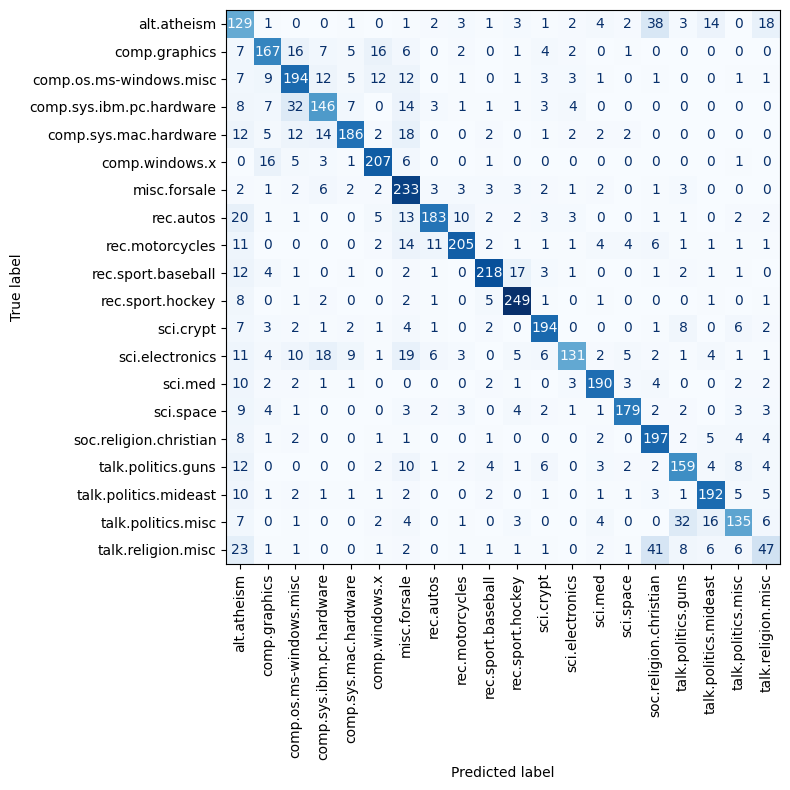

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(ax=ax, cmap='Blues', colorbar=False)
ax.xaxis.set_tick_params(rotation=90)
plt.tight_layout()
plt.show()

## Explanation

In [12]:
import pandas as pd 

In [13]:
features = vec.get_feature_names_out()
ge = born.explain()
E = pd.DataFrame(ge.toarray(), index=features, columns=data.target_names)

In [25]:
E.loc['gun'].sort_values(ascending=False)

talk.politics.guns          0.022104
talk.religion.misc          0.007073
talk.politics.misc          0.006742
rec.autos                   0.005834
rec.motorcycles             0.005037
sci.electronics             0.004839
soc.religion.christian      0.004256
sci.crypt                   0.004023
comp.os.ms-windows.misc     0.003752
alt.atheism                 0.003303
misc.forsale                0.003148
sci.space                   0.003097
rec.sport.hockey            0.002985
talk.politics.mideast       0.002639
rec.sport.baseball          0.001576
sci.med                     0.000607
comp.graphics               0.000000
comp.windows.x              0.000000
comp.sys.mac.hardware       0.000000
comp.sys.ibm.pc.hardware    0.000000
Name: gun, dtype: float64

In [26]:
E['sci.space'].sort_values(ascending=False).head(10)

orbit         0.033894
shuttle       0.031366
space         0.030565
moon          0.026371
exit          0.025704
launch        0.024628
spacecraft    0.024428
solar         0.023846
nasa          0.023308
lunar         0.022167
Name: sci.space, dtype: float64

**Local**

In [35]:
document = 10
txt = data.data[document]
print(txt)
label = data.target[document]
print(label, data.target_names[label])

the blood of the lamb.

This will be a hard task, because most cultures used most animals
for blood sacrifices. It has to be something related to our current
post-modernism state. Hmm, what about used computers?

Cheers,
Kent
19 talk.religion.misc


In [36]:
x = vec.transform([txt])
y_hat = born.predict(x)
print(label, y_hat[0])

19 19


In [37]:
pd.DataFrame(born.predict_proba(x), columns=data.target_names).T.sort_values(0, ascending=False)

,0
talk.religion.misc,0.310529
alt.atheism,0.107716
sci.med,0.060262
soc.religion.christian,0.048255
talk.politics.guns,0.043266
talk.politics.mideast,0.042070
comp.sys.ibm.pc.hardware,0.040520
rec.motorcycles,0.036031
comp.sys.mac.hardware,0.033884
talk.politics.misc,0.033815


In [38]:
local_e = born.explain(x)

In [39]:
L = pd.DataFrame(local_e.toarray(), index=features, columns=data.target_names)

In [41]:
L['talk.religion.misc'].sort_values(ascending=False).head(10)

kent              0.004685
cheers            0.001714
blood             0.001332
lamb              0.001164
post-modernism    0.001022
animals           0.000791
sacrifices        0.000519
cultures          0.000468
computers         0.000313
hard              0.000274
Name: talk.religion.misc, dtype: float64

In [42]:
L['sci.med'].sort_values(ascending=False).head(10)

blood         0.001870
cheers        0.000563
animals       0.000382
cultures      0.000346
of            0.000257
used          0.000237
sacrifices    0.000234
hard          0.000205
for           0.000197
the           0.000196
Name: sci.med, dtype: float64